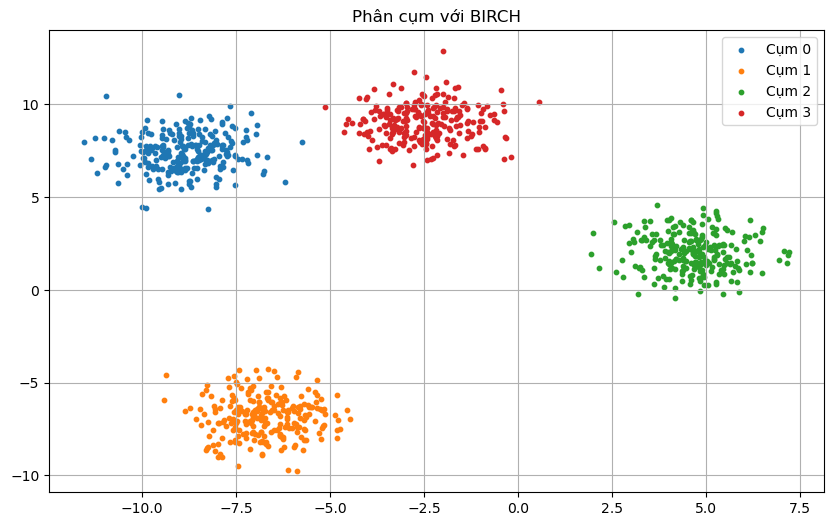

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Định nghĩa lớp cho các cụm
class ClusterFeature:
    def __init__(self, centroid, n_points):
        self.centroid = centroid  # Trung tâm của cụm
        self.n_points = n_points    # Số lượng điểm trong cụm

# Định nghĩa thuật toán BIRCH
class Birch:
    def __init__(self, threshold):
        self.threshold = threshold  # Ngưỡng cho bán kính cụm
        self.clusters = []          # Danh sách các cụm

    def fit(self, X):
        for point in X:
            self._insert(point)

    def _insert(self, point):
        # Nếu không có cụm nào, tạo một cụm mới
        if not self.clusters:
            cf = ClusterFeature(point, 1)
            self.clusters.append(cf)
        else:
            # Tìm cụm gần nhất
            closest_cluster = None
            closest_distance = float('inf')

            for cluster in self.clusters:
                distance = np.linalg.norm(point - cluster.centroid)
                if distance < self.threshold:
                    # Nếu khoảng cách nhỏ hơn ngưỡng, cập nhật cụm
                    if distance < closest_distance:
                        closest_distance = distance
                        closest_cluster = cluster

            if closest_cluster:
                # Cập nhật cụm hiện tại
                new_n_points = closest_cluster.n_points + 1
                new_centroid = (closest_cluster.centroid * closest_cluster.n_points + point) / new_n_points
                closest_cluster.centroid = new_centroid
                closest_cluster.n_points = new_n_points
            else:
                # Nếu không có cụm nào phù hợp, tạo cụm mới
                cf = ClusterFeature(point, 1)
                self.clusters.append(cf)

# Tạo dữ liệu mẫu với nhiều cụm
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

# Áp dụng thuật toán BIRCH
birch_model = Birch(threshold=5)
birch_model.fit(X)

# Hiển thị
colors = ['red', 'green', 'blue', 'orange']
labels = np.array([np.argmin([np.linalg.norm(cf.centroid - point) for cf in birch_model.clusters]) for point in X])
plt.figure(figsize=(10, 6))
for i in range(len(colors)):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cụm {i}', s=10)

plt.title('Phân cụm với BIRCH')
plt.legend()
plt.grid()
plt.show()